# CITS4403 Project

This notebook kickstarts our project by taking a simple data matrix of our chosen domain of study (migration flows) and applies the knowledge learned in lab 1. 

Our plan is to build on this foundation through subsequent notebooks applying each of the lessons learnt in later labs (where applicable), continually layering on complexity as we go and hopefully observing emergent properties and drawing inferences from the modeling as we go.

**Data Source**: https://figshare.com/collections/Bilateral_international_migration_flow_estimates_for_200_countries/4470464/10

# Migration Flow Graph - The Basics

This notebook builds a simple graph representation of international migration flows.

**Code Goals:**
- Load migration data from CSV
- Create a directed graph with NetworkX
- Visualise the migration network

## Environment Setup

As this is the very start of our project, here's a quick note & reminder on how I start my Python environment in Windows.

1. Open PowerShell in the root of the code folder, run:
   ```bash
   python3 -m venv venv
   ```

2. Activate the virtual environment:
   ```bash
   .\venv\Scripts\Activate
   ```

3. Install dependencies:
   ```bash
   pip install -r requirements.txt
   ```

4. Close & re-open VSCode

5. Run any code block, when prompted for a Python environment(s) select:

   **venv (Python 3.13.7) venv\Scripts\python.exe**

This only needs to be done once.

## Setup

Import the libraries we need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Set random seed for reproducibility
# np.random.seed(99) # Commented out, it's not used in this notebook, it's just in a lot of my other study so landed up here, feel free to delete

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Load the Data

Loads the migration data from `../data/bilat_mig.csv`

- Reads the CSV file into a DataFrame
- Prints the first few rows to see what it looks like
- Checks the shape (how many rows/columns)

In [3]:
# Loads our pre-processed migration data
df = pd.read_csv('../data/bilat_mig.csv')

# Display first few rows to understand the structure
print("First 10 rows of migration data:")
print(df.head(10))
print("\nDataset shape:", df.shape)
print("Columns:", df.columns.tolist())

First 10 rows of migration data:
  orig dest  da_pb_closed
0  PHL  PHL          0.00
1  IND  PHL       9876.29
2  SYR  PHL          0.00
3  POL  PHL          0.36
4  GBR  PHL      15409.79
5  DEU  PHL        162.60
6  MEX  PHL         69.66
7  CAN  PHL      59301.84
8  USA  PHL     201498.26
9  AUS  PHL      25960.67

Dataset shape: (100, 3)
Columns: ['orig', 'dest', 'da_pb_closed']


## Explore the Data

Expands on the quick check of the data above by exploring the data a little more, this block:

  - Shows data types and missing values
  - Provides statistics (mean, min, max, etc.)
  - Lists all countries (unique)
  - Shows the range of migration values

Added lots of lines for a little razzle dazzle :-)

In [15]:
# Basic information about the dataset

print("\n" + "="*50)
print("Dataset Info:")
print("="*50)
print(df.info())
print("\n" + "="*50)
print("Statistical Summary:")
print("="*50)
print(df.describe())
print("\n" + "="*50)
print("Unique countries (origins):")
print("="*50)
print(sorted(df['orig'].unique()))

print("\n" + "="*50)
print("Migration flow statistics:")
print("="*50)
print(f"Minimum flow: {df['da_pb_closed'].min()}")
print(f"Maximum flow: {df['da_pb_closed'].max()}")
print(f"Average flow: {df['da_pb_closed'].mean():.2f}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   orig          100 non-null    object 
 1   dest          100 non-null    object 
 2   da_pb_closed  100 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.5+ KB
None

Statistical Summary:
       da_pb_closed
count  1.000000e+02
mean   1.229238e+05
std    3.443672e+05
min    0.000000e+00
25%    1.536850e+02
50%    1.384105e+04
75%    9.153538e+04
max    2.519678e+06

Unique countries (origins):
['AUS', 'CAN', 'DEU', 'GBR', 'IND', 'MEX', 'PHL', 'POL', 'SYR', 'USA']

Migration flow statistics:
Minimum flow: 0.0
Maximum flow: 2519677.52
Average flow: 122923.80


## Create the Graph

Basics taken from lab 1 here:
- Using `nx.DiGraph()` to create a directed graph
- Countries are nodes
- Migration flows are the weighted edges (number of migrants)
- Loops through all rows in the dataframe to add edges


In [16]:
# Create an empty directed graph
G = nx.DiGraph()

# Add edges from the dataframe
# Each row represents a migration flow from origin to destination
for index, row in df.iterrows():
    origin = row['orig']
    destination = row['dest']
    flow = row['da_pb_closed']

    # Only add edges where there's actual migration flow, i.e. 0 or flow to/from the same country are ignored
    if flow > 0:
        G.add_edge(origin, destination, weight=flow)

print("Graph created successfully!")
print(f"Added {G.number_of_edges()} migration flows between {G.number_of_nodes()} countries")

Graph created successfully!
Added 88 migration flows between 10 countries


## Display the Graph Information

Again this is an informative and troubleshooting step to continually check the data is forming as expected:
- How many countries (nodes) are in the graph?
- How many migration flows (edges) were added?
- What are all the country codes?


In [ ]:
# Print basic graph statistics
print("="*50)
print("Graph Statistics")
print("="*50)
print(f"Number of countries: {G.number_of_nodes()}")
print(f"Number of migration flows: {G.number_of_edges()}")
print(f"\nCountries in the network:")
print(sorted(list(G.nodes())))

GRAPH STATISTICS
Number of countries: 10
Number of migration flows: 88

Countries in the network:
['AUS', 'CAN', 'DEU', 'GBR', 'IND', 'MEX', 'PHL', 'POL', 'SYR', 'USA']


## Visualise the Graph

Visualise the migration network:
- Uses a **circular layout** (same as Lab 1) to arrange countries in a circle
- Arrows show the direction of migration flows
- Node labels show country codes

C:\Users\zacba\AppData\Local\Temp\ipykernel_17508\2057748401.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


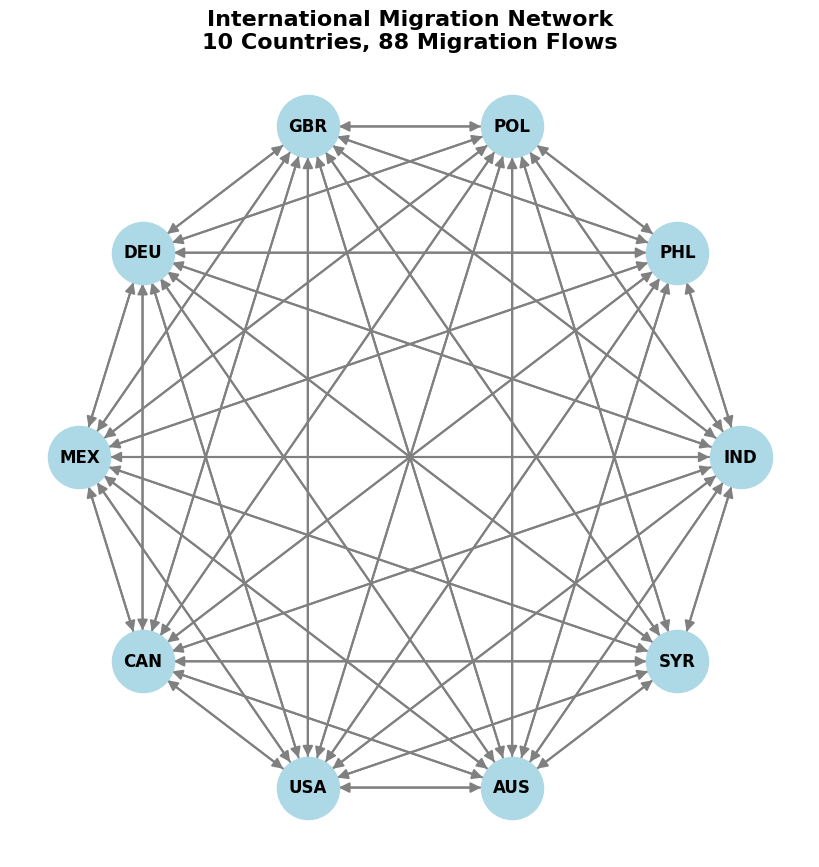

Visualisation complete!


In [21]:
# Create a figure for our graph visualisation (a canvas)
plt.figure(figsize=(8, 8))

# Draw the graph using circular layout, arrows=True for direction origin -> destination.
nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', arrows=True, arrowsize=15, edge_color='gray', width=1.5)

plt.title("International Migration Network\n10 Countries, 88 Migration Flows", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Visualisation complete!")

## Visualisation Inference for Report

These notes under each visualisation can be deleted if you wish prior to submitting our report. I am just going to jot down what comes to mind when I see a visualisation, is there something that can be inferred or are there emergent properties? 

The above seems to show while ignoring the magnitude of migration, the world is highly connected (97.8%, very close to a complete graph)